C:\Users\Akshiya George\AppData\Local\Temp\ipykernel_23124\3614901166.py:8: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Shape: (404800, 27)
Missing values:
 age                          0
gender                       0
marital_status               0
education                 2404
monthly_salary               0
employment_type              0
years_of_employment          0
company_type                 0
house_type                   0
monthly_rent              2426
family_size                  0
dependents                   0
school_fees                  0
college_fees                 0
travel_expenses              0
groceries_utilities          0
other_monthly_expenses       0
existing_loans               0
current_emi_amount           0
credit_score              2420
bank_balance              2426
emergency_fund            2351
emi_scenario                 0
requested_amount             0
requested_tenure             0
emi_eligibility              0
max_monthly_emi              0
dtype: int64
Duplicates: 0
             age  gender marital_status education  monthly_salary  \
count   402380.0  402380      

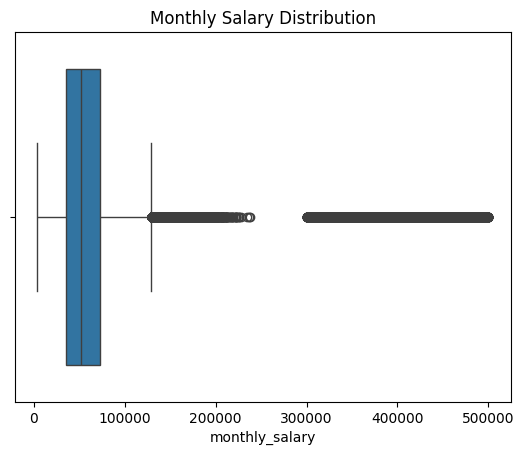

✅ Data preprocessing complete. Ready for feature engineering and model training.


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# 📂 Step 1: Load the dataset
file_path = r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\EMI\emi_prediction_dataset.csv"
df = pd.read_csv(file_path)

# 🔍 Step 2: Initial inspection
print("Shape:", df.shape)
print("Missing values:\n", df.isnull().sum())
print("Duplicates:", df.duplicated().sum())

# 🧹 Step 3: Drop duplicates and handle missing values
df.drop_duplicates(inplace=True)

# Drop rows with critical missing values
df.dropna(subset=["monthly_salary", "credit_score", "emi_eligibility"], inplace=True)

# Impute non-critical missing values
df.fillna({
    "school_fees": 0,
    "college_fees": 0,
    "monthly_rent": 0,
    "travel_expenses": 0,
    "groceries_utilities": 0,
    "other_monthly_expenses": 0,
    "emergency_fund": df["emergency_fund"].median()
}, inplace=True)

# 🧼 Step 4: Convert data types
categorical_cols = [
    "gender", "marital_status", "education", "employment_type", "company_type",
    "house_type", "existing_loans", "emi_scenario", "emi_eligibility"
]
df[categorical_cols] = df[categorical_cols].astype("category")

numerical_cols = [
    "monthly_salary", "years_of_employment", "monthly_rent", "family_size", "dependents",
    "school_fees", "college_fees", "travel_expenses", "groceries_utilities",
    "other_monthly_expenses", "current_emi_amount", "credit_score", "bank_balance",
    "emergency_fund", "requested_amount", "requested_tenure"
]
df[numerical_cols] = df[numerical_cols].apply(pd.to_numeric, errors="coerce")

# 🧪 Step 5: Data quality check
print(df.describe(include="all"))

# 📊 Optional: Visualize outliers
sns.boxplot(x=df["monthly_salary"])
plt.title("Monthly Salary Distribution")
plt.show()

# 🧭 Step 6: Train-Test-Validation Split
# Classification
X_cls = df.drop(columns=["emi_eligibility", "max_monthly_emi"], errors="ignore")
y_cls = df["emi_eligibility"]

X_cls_train, X_cls_temp, y_cls_train, y_cls_temp = train_test_split(X_cls, y_cls, test_size=0.3, random_state=42)
X_cls_val, X_cls_test, y_cls_val, y_cls_test = train_test_split(X_cls_temp, y_cls_temp, test_size=0.5, random_state=42)

# Regression
X_reg = df.drop(columns=["emi_eligibility", "max_monthly_emi"], errors="ignore")
y_reg = df["max_monthly_emi"]

X_reg_train, X_reg_temp, y_reg_train, y_reg_temp = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)
X_reg_val, X_reg_test, y_reg_val, y_reg_test = train_test_split(X_reg_temp, y_reg_temp, test_size=0.5, random_state=42)

print("✅ Data preprocessing complete. Ready for feature engineering and model training.")

C:\Users\Akshiya George\AppData\Local\Temp\ipykernel_23124\3986680010.py:8: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


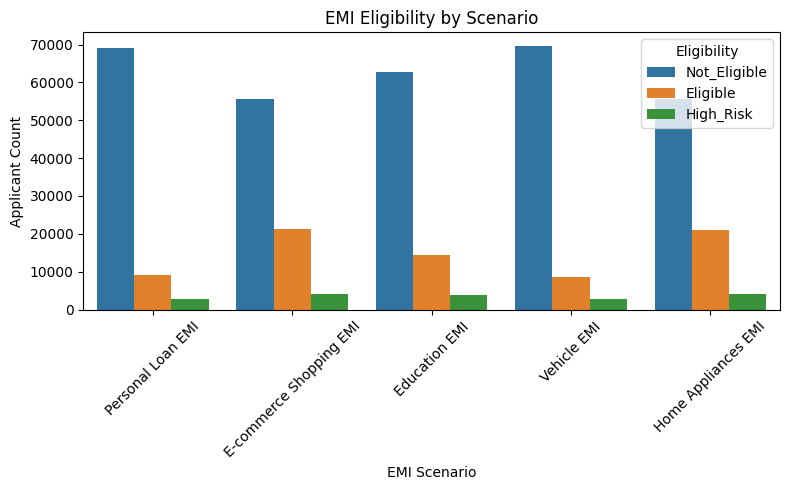

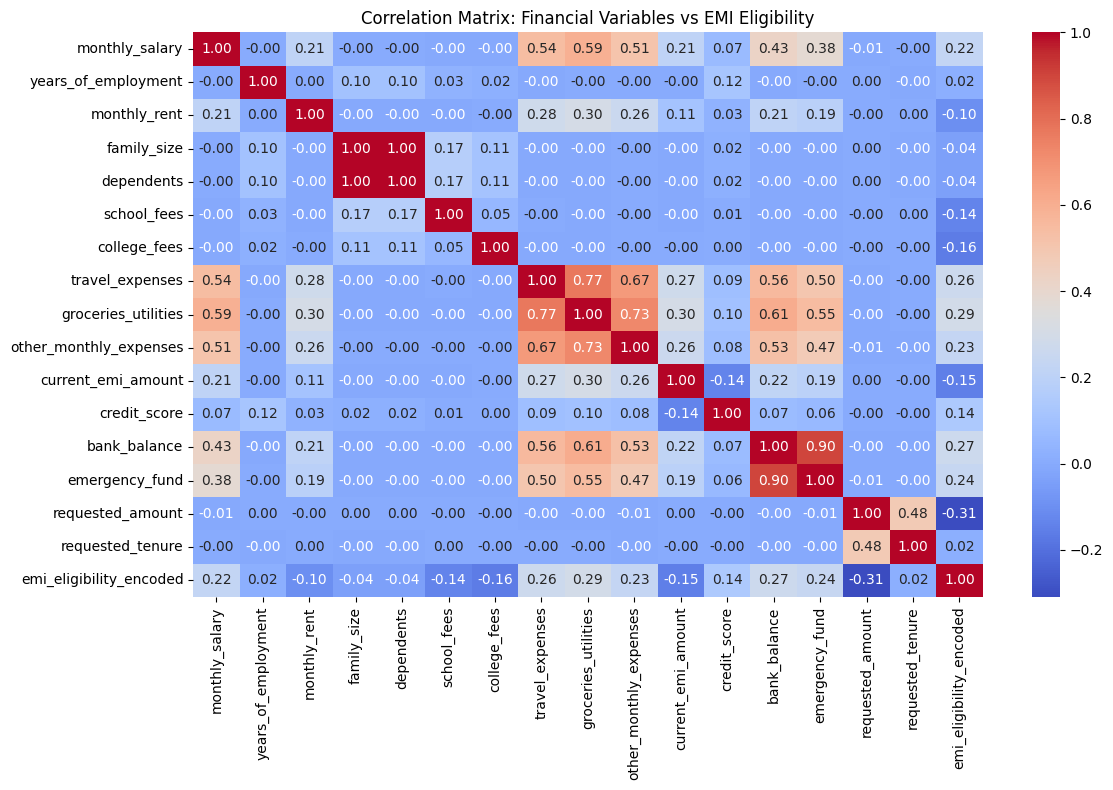

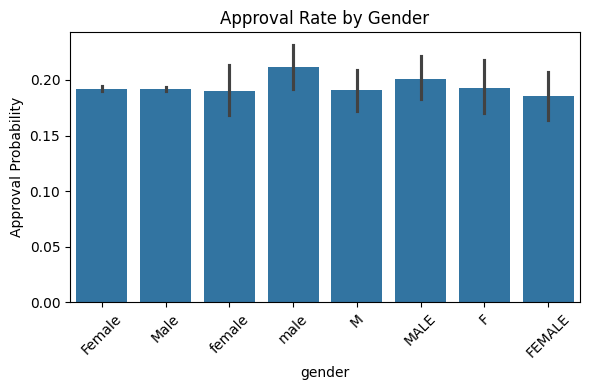

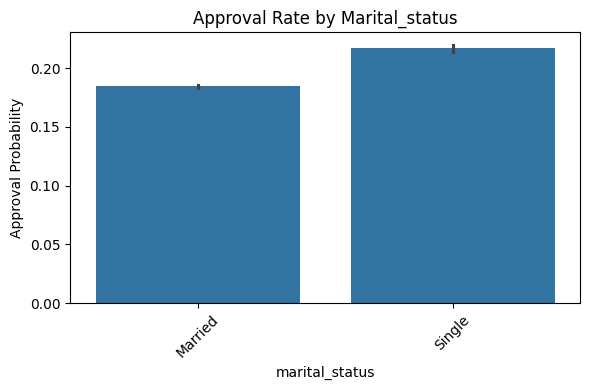

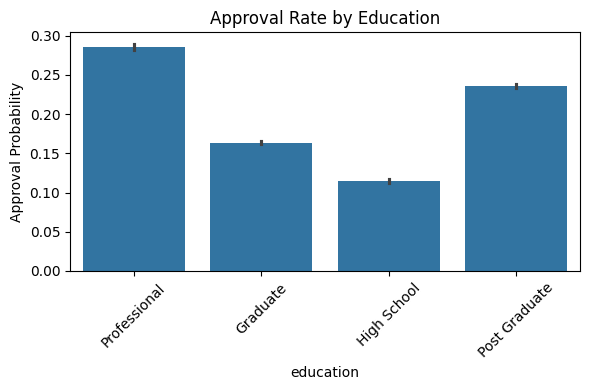

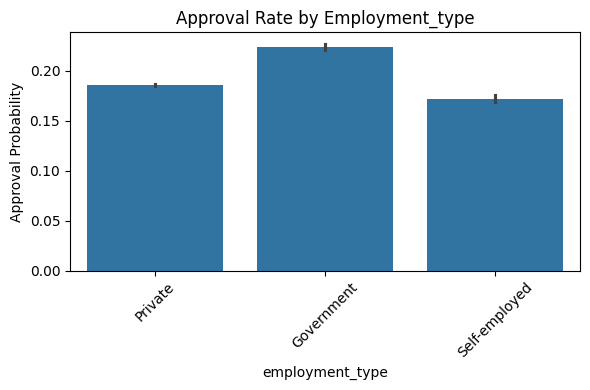

📊 Average Financial Profile by EMI Eligibility:
 emi_eligibility              Eligible      High_Risk   Not_Eligible
monthly_salary           79002.240054   70257.357790   54272.968854
years_of_employment          5.580190       5.532848       5.309331
monthly_rent              4060.517278    4535.565998    6318.349661
family_size                  2.859387       2.861610       2.964475
dependents                   1.859387       1.861610       1.964475
school_fees               3252.082233    3390.685142    5022.661189
college_fees              1692.870646    1805.163735    4760.341266
travel_expenses           7479.133191    6639.118849    5207.584135
groceries_utilities      16849.409246   15032.895126   11718.206154
other_monthly_expenses    9184.045481    8231.012021    6565.485377
current_emi_amount        2399.032554    3072.925919    5129.378443
credit_score               725.771747     716.116125     694.083938
bank_balance            339306.207778  293936.276426  215539.124328

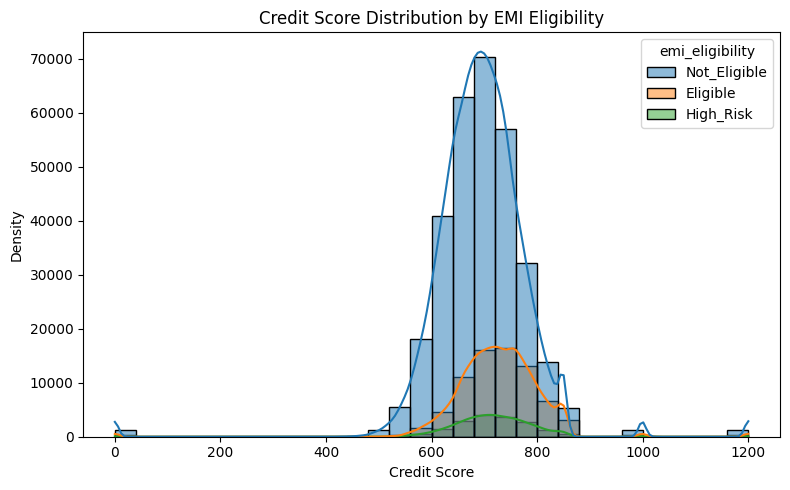

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 📂 Load cleaned dataset
file_path = r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\EMI\emi_prediction_dataset.csv"
df = pd.read_csv(file_path)

# ✅ Encode target for analysis
df["emi_eligibility_encoded"] = df["emi_eligibility"].map({"Eligible": 1, "Not_Eligible": 0})

# 📊 1. EMI Eligibility Distribution Across Lending Scenarios
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="emi_scenario", hue="emi_eligibility")
plt.title("EMI Eligibility by Scenario")
plt.xlabel("EMI Scenario")
plt.ylabel("Applicant Count")
plt.xticks(rotation=45)
plt.legend(title="Eligibility")
plt.tight_layout()
plt.show()

# 📈 2. Correlation Between Financial Variables and Loan Approval
numerical_cols = [
    "monthly_salary", "years_of_employment", "monthly_rent", "family_size", "dependents",
    "school_fees", "college_fees", "travel_expenses", "groceries_utilities",
    "other_monthly_expenses", "current_emi_amount", "credit_score", "bank_balance",
    "emergency_fund", "requested_amount", "requested_tenure", "emi_eligibility_encoded"
]

# ✅ Clean and filter numeric data
numeric_df = df[numerical_cols].apply(pd.to_numeric, errors="coerce").dropna()

# ✅ Correlation matrix
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix: Financial Variables vs EMI Eligibility")
plt.tight_layout()
plt.show()

# 👥 3. Demographic Patterns and Risk Factors
demographic_cols = ["gender", "marital_status", "education", "employment_type"]

for col in demographic_cols:
    plt.figure(figsize=(6, 4))
    sns.barplot(x=col, y="emi_eligibility_encoded", data=df, estimator=np.mean)
    plt.title(f"Approval Rate by {col.capitalize()}")
    plt.ylabel("Approval Probability")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 📋 4. Statistical Summaries and Business Insights
safe_numeric_cols = df[numerical_cols[:-1]].apply(pd.to_numeric, errors="coerce")
safe_df = pd.concat([df["emi_eligibility"], safe_numeric_cols], axis=1).dropna()

summary = safe_df.groupby("emi_eligibility").mean().T
print("📊 Average Financial Profile by EMI Eligibility:\n", summary)

approval_rate = df["emi_eligibility"].value_counts(normalize=True) * 100
print("\n✅ Overall EMI Approval Rate:\n", approval_rate)

# 🧠 Bonus: Credit Score Distribution
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="credit_score", hue="emi_eligibility", kde=True, bins=30)
plt.title("Credit Score Distribution by EMI Eligibility")
plt.xlabel("Credit Score")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

In [3]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 🎯 Encode target for modeling
df["emi_eligibility_encoded"] = df["emi_eligibility"].map({"Eligible": 1, "Not_Eligible": 0})

# 🧮 1. Clean and convert all relevant financial columns
expense_cols = [
    "school_fees", "college_fees", "monthly_rent", "travel_expenses",
    "groceries_utilities", "other_monthly_expenses"
]

financial_cols = expense_cols + [
    "monthly_salary", "emergency_fund", "requested_amount",
    "current_emi_amount", "credit_score", "years_of_employment",
    "requested_tenure", "bank_balance"
]

for col in financial_cols:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(",", "").str.strip(), errors="coerce").fillna(0)

# ✅ 2. Derived Financial Ratios
df["total_expenses"] = df[expense_cols].sum(axis=1)
df["debt_to_income_ratio"] = df["current_emi_amount"] / (df["monthly_salary"] + 1)
df["expense_to_income_ratio"] = df["total_expenses"] / (df["monthly_salary"] + 1)
df["affordability_ratio"] = (df["monthly_salary"] + df["emergency_fund"]) / (df["requested_amount"] + 1)

# ✅ 3. Risk Scoring Features
df["credit_risk_score"] = df["credit_score"] / 900
df["employment_stability_score"] = df["years_of_employment"] / (df["requested_tenure"] + 1)

# ✅ 4. Interaction Features
df["income_x_credit"] = df["monthly_salary"] * df["credit_score"]
df["emi_x_expense"] = df["current_emi_amount"] * df["total_expenses"]
df["balance_x_emergency"] = df["bank_balance"] * df["emergency_fund"]

# 🧼 5. Categorical Encoding + Numerical Scaling
categorical_features = [
    "gender", "marital_status", "education", "employment_type", "company_type",
    "house_type", "existing_loans", "emi_scenario"
]

numerical_features = [
    "monthly_salary", "years_of_employment", "monthly_rent", "family_size", "dependents",
    "school_fees", "college_fees", "travel_expenses", "groceries_utilities",
    "other_monthly_expenses", "current_emi_amount", "credit_score", "bank_balance",
    "emergency_fund", "requested_amount", "requested_tenure",
    "total_expenses", "debt_to_income_ratio", "expense_to_income_ratio",
    "affordability_ratio", "credit_risk_score", "employment_stability_score",
    "income_x_credit", "emi_x_expense", "balance_x_emergency"
]

# ✅ Preprocessing pipeline
preprocessor = ColumnTransformer([
    ("num", Pipeline([
        ("scaler", StandardScaler())
    ]), numerical_features),
    ("cat", Pipeline([
        ("encoder", OneHotEncoder(drop="first", handle_unknown="ignore"))
    ]), categorical_features)
])

# 🧪 Apply preprocessing to classification and regression inputs
X_cls_full = df[categorical_features + numerical_features]
X_cls_processed = preprocessor.fit_transform(X_cls_full)

X_reg_full = df[categorical_features + numerical_features]
X_reg_processed = preprocessor.transform(X_reg_full)

print("✅ Feature engineering complete. Data is now clean, transformed, and ready for model training.")

✅ Feature engineering complete. Data is now clean, transformed, and ready for model training.


In [8]:
# 📦 Imports
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import xgboost as xgb

# ✅ Step 1: Reconstruct cleaned feature set
X_full = df[categorical_features + numerical_features].dropna()

# ✅ Step 2: Align targets and drop NaNs from target columns
y_cls_raw = df.loc[X_full.index, "emi_eligibility_encoded"]
y_reg_raw = df.loc[X_full.index, "max_monthly_emi"]

valid_cls_idx = y_cls_raw.dropna().index
valid_reg_idx = y_reg_raw.dropna().index

X_cls_final = X_full.loc[valid_cls_idx]
y_cls_final = y_cls_raw.loc[valid_cls_idx]

X_reg_final = X_full.loc[valid_reg_idx]
y_reg_final = y_reg_raw.loc[valid_reg_idx]

# ✅ Step 3: Re-transform features
X_cls_processed = preprocessor.fit_transform(X_cls_final)
X_reg_processed = preprocessor.transform(X_reg_final)

# ✅ Step 4: Train-test splits
X_cls_train, X_cls_test, y_cls_train, y_cls_test = train_test_split(X_cls_processed, y_cls_final, test_size=0.2, random_state=42)
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg_processed, y_reg_final, test_size=0.2, random_state=42)

# 📊 Classification Models (SVC removed)
classification_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# 📈 Regression Models (SVR removed)
regression_models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost Regressor": xgb.XGBRegressor(objective="reg:squarederror", random_state=42),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42)
}

# 📊 Classification Evaluation
def evaluate_classification(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_prob)
    }

# 📈 Regression Evaluation
def evaluate_regression(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "MAE": mean_absolute_error(y_test, y_pred),
        "R-Squared": r2_score(y_test, y_pred),
        "MAPE": np.mean(np.abs((y_test - y_pred) / (y_test + 1))) * 100
    }

# 🧪 Train & Evaluate Classification
print("\n📊 Classification Model Results:")
cls_results = {}
for name, model in classification_models.items():
    model.fit(X_cls_train, y_cls_train)
    metrics = evaluate_classification(model, X_cls_test, y_cls_test)
    cls_results[name] = metrics
    print(f"\n{name}:")
    for k, v in metrics.items():
        print(f"  {k}: {v:.4f}")

# 🧪 Train & Evaluate Regression
print("\n📈 Regression Model Results:")
reg_results = {}
for name, model in regression_models.items():
    model.fit(X_reg_train, y_reg_train)
    metrics = evaluate_regression(model, X_reg_test, y_reg_test)
    reg_results[name] = metrics
    print(f"\n{name}:")
    for k, v in metrics.items():
        print(f"  {k}: {v:.4f}")

# 🏆 Select Best Models
best_cls_model = max(cls_results.items(), key=lambda x: x[1]["ROC-AUC"])
best_reg_model = min(reg_results.items(), key=lambda x: x[1]["RMSE"])

print(f"\n✅ Best Classification Model: {best_cls_model[0]} with ROC-AUC: {best_cls_model[1]['ROC-AUC']:.4f}")
print(f"✅ Best Regression Model: {best_reg_model[0]} with RMSE: {best_reg_model[1]['RMSE']:.4f}")


📊 Classification Model Results:

Logistic Regression:
  Accuracy: 0.9371
  Precision: 0.8552
  Recall: 0.8037
  F1-Score: 0.8287
  ROC-AUC: 0.9754

Random Forest:
  Accuracy: 0.9783
  Precision: 0.9737
  Recall: 0.9102
  F1-Score: 0.9409
  ROC-AUC: 0.9973


C:\Users\Akshiya George\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xgboost\training.py:183: UserWarning: [21:50:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost:
  Accuracy: 0.9957
  Precision: 0.9912
  Recall: 0.9861
  F1-Score: 0.9887
  ROC-AUC: 0.9998

Decision Tree:
  Accuracy: 0.9636
  Precision: 0.9044
  Recall: 0.9030
  F1-Score: 0.9037
  ROC-AUC: 0.9404

📈 Regression Model Results:

Linear Regression:
  RMSE: 4154.0547
  MAE: 2980.6571
  R-Squared: 0.7123
  MAPE: 188.3500

Random Forest Regressor:
  RMSE: 1085.6789
  MAE: 442.2419
  R-Squared: 0.9803
  MAPE: 8.5165

XGBoost Regressor:
  RMSE: 879.7392
  MAE: 449.9522
  R-Squared: 0.9871
  MAPE: 16.4809

Decision Tree Regressor:
  RMSE: 1572.9811
  MAE: 654.4416
  R-Squared: 0.9587
  MAPE: 11.2837

✅ Best Classification Model: XGBoost with ROC-AUC: 0.9998
✅ Best Regression Model: XGBoost Regressor with RMSE: 879.7392


In [ ]:
# 📦 Imports
import pandas as pd
import numpy as np
import os
import joblib
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_squared_error, mean_absolute_error, r2_score
import shap
import matplotlib.pyplot as plt
import mlflow

# 📂 Load dataset
file_path = r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\EMI\emi_prediction_dataset.csv"
df = pd.read_csv(file_path)

# 🧹 Clean and convert columns
df["age"] = pd.to_numeric(df["age"], errors="coerce")
df["monthly_salary"] = pd.to_numeric(df["monthly_salary"], errors="coerce")
df["credit_score"] = pd.to_numeric(df["credit_score"], errors="coerce")
df["emi_eligibility"] = df["emi_eligibility"].astype(str)

fill_zero = ["school_fees", "college_fees", "monthly_rent", "travel_expenses",
             "groceries_utilities", "other_monthly_expenses"]
for col in fill_zero + ["emergency_fund", "current_emi_amount", "requested_amount",
                        "requested_tenure", "bank_balance", "years_of_employment"]:
    df[col] = pd.to_numeric(df[col], errors="coerce").fillna(0)

# 🎯 Encode target
df["emi_eligibility_encoded"] = df["emi_eligibility"].map({"Eligible": 1, "Not_Eligible": 0})

# 🧮 Feature Engineering
df["total_expenses"] = df[fill_zero].sum(axis=1)
df["debt_to_income_ratio"] = df["current_emi_amount"] / (df["monthly_salary"] + 1)
df["expense_to_income_ratio"] = df["total_expenses"] / (df["monthly_salary"] + 1)
df["affordability_ratio"] = (df["monthly_salary"] + df["emergency_fund"]) / (df["requested_amount"] + 1)
df["credit_risk_score"] = df["credit_score"] / 900
df["employment_stability_score"] = df["years_of_employment"] / (df["requested_tenure"] + 1)
df["income_x_credit"] = df["monthly_salary"] * df["credit_score"]
df["emi_x_expense"] = df["current_emi_amount"] * df["total_expenses"]
df["balance_x_emergency"] = df["bank_balance"] * df["emergency_fund"]

df.dropna(subset=["emi_eligibility_encoded", "max_monthly_emi"], inplace=True)

# 🔧 Feature columns
categorical_cols = ["gender", "marital_status", "education", "employment_type",
                    "company_type", "house_type", "emi_scenario"]
numerical_cols = ["age", "monthly_salary", "years_of_employment", "monthly_rent", "family_size", "dependents",
                  "school_fees", "college_fees", "travel_expenses", "groceries_utilities", "other_monthly_expenses",
                  "current_emi_amount", "credit_score", "bank_balance", "emergency_fund", "requested_amount",
                  "requested_tenure", "total_expenses", "debt_to_income_ratio", "expense_to_income_ratio",
                  "affordability_ratio", "credit_risk_score", "employment_stability_score",
                  "income_x_credit", "emi_x_expense", "balance_x_emergency"]

X = df[categorical_cols + numerical_cols].copy()
y_cls = df["emi_eligibility_encoded"]
y_reg = df["max_monthly_emi"]

# ✅ Preprocessing pipeline
preprocessor = ColumnTransformer([
    ("num", Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ]), numerical_cols),
    ("cat", Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(drop="first", handle_unknown="ignore"))
    ]), categorical_cols)
])

X_transformed = preprocessor.fit_transform(X)

# 📊 Train-test split
X_cls_train, X_cls_test, y_cls_train, y_cls_test = train_test_split(X_transformed, y_cls, test_size=0.2, random_state=42)
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_transformed, y_reg, test_size=0.2, random_state=42)

# 🔍 Classification Models
classification_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
}

print("\n🔍 Classification Model Evaluation")
cls_scores = {}
for name, model in classification_models.items():
    model.fit(X_cls_train, y_cls_train)
    y_pred = model.predict(X_cls_test)
    f1 = f1_score(y_cls_test, y_pred)
    cls_scores[name] = f1
    print(f"\n📌 {name}")
    print("F1 Score:", round(f1, 4))

# 🏆 Best classification model
best_cls_model_name = max(cls_scores, key=cls_scores.get)
best_cls_model = classification_models[best_cls_model_name]
print(f"\n✅ Best Classification Model: {best_cls_model_name}")

# 📈 Regression Models
regression_models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBoost Regressor": XGBRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor()
}

print("\n📊 Regression Model Evaluation")
reg_scores = {}
for name, model in regression_models.items():
    model.fit(X_reg_train, y_reg_train)
    y_pred = model.predict(X_reg_test)
    rmse = np.sqrt(mean_squared_error(y_reg_test, y_pred))
    reg_scores[name] = rmse
    print(f"\n📌 {name}")
    print("RMSE:", round(rmse, 2))

# 🏆 Best regression model
best_reg_model_name = min(reg_scores, key=reg_scores.get)
best_reg_model = regression_models[best_reg_model_name]
print(f"\n✅ Best Regression Model: {best_reg_model_name}")

# 📊 SHAP Feature Importance (for classification)
explainer = shap.Explainer(best_cls_model, X_cls_test)
shap_values = explainer(X_cls_test)
shap.summary_plot(shap_values, X_cls_test, show=False)
plt.savefig("models/shap_summary.png", bbox_inches='tight')
print("📊 SHAP summary plot saved to models/shap_summary.png")

# 💾 Save models
os.makedirs("models", exist_ok=True)
joblib.dump(preprocessor, "models/preprocessor.pkl")
joblib.dump(best_cls_model, "models/emi_classifier.pkl")
joblib.dump(best_reg_model, "models/emi_regressor.pkl")

# 📋 MLflow Logging
mlflow.set_tracking_uri("file:///C:/Users/Akshiya George/OneDrive/Desktop/Data Science/EMI/mlruns")
mlflow.set_experiment("EMI_Prediction")

with mlflow.start_run():
    mlflow.log_param("best_cls_model", best_cls_model_name)
    mlflow.log_param("best_reg_model", best_reg_model_name)
    mlflow.log_metric("classification_f1", cls_scores[best_cls_model_name])
    mlflow.log_metric("regression_rmse", reg_scores[best_reg_model_name])
    mlflow.log_artifact("models/preprocessor.pkl")
    mlflow.log_artifact("models/emi_classifier.pkl")
    mlflow.log_artifact("models/emi_regressor.pkl")
    mlflow.log_artifact("models/shap_summary.png")

print("\n✅ Models, SHAP plot, and metrics logged to MLflow.")

In [11]:
# 📦 Imports
import mlflow
import mlflow.sklearn
import mlflow.xgboost
from datetime import datetime
import os

# ✅ Set MLflow tracking URI (local or remote server)
mlflow.set_tracking_uri("http://127.0.0.1:5000") # or your remote URI
mlflow.set_experiment("EMI_Prediction_Experiment")

# 📁 Create artifact directory
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
artifact_dir = f"artifacts/emi_models_{timestamp}"
os.makedirs(artifact_dir, exist_ok=True)

# 📊 Classification Models
classification_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBClassifier(eval_metric="logloss", random_state=42)
}

# 📈 Regression Models
regression_models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost Regressor": xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
}

# 📊 Classification Evaluation
def evaluate_classification(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred
    return {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "f1_score": f1_score(y_test, y_pred),
        "roc_auc": roc_auc_score(y_test, y_prob)
    }

# 📈 Regression Evaluation
def evaluate_regression(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        "rmse": np.sqrt(mean_squared_error(y_test, y_pred)),
        "mae": mean_absolute_error(y_test, y_pred),
        "r2": r2_score(y_test, y_pred),
        "mape": np.mean(np.abs((y_test - y_pred) / (y_test + 1))) * 100
    }

# ✅ 1–4: Train, log, and store classification models
for name, model in classification_models.items():
    with mlflow.start_run(run_name=f"Classification - {name}"):
        model.fit(X_cls_train, y_cls_train)
        metrics = evaluate_classification(model, X_cls_test, y_cls_test)

        # Log parameters and metrics
        mlflow.log_param("model_type", name)
        for k, v in metrics.items():
            mlflow.log_metric(k, v)

        # Save model artifact
        model_path = os.path.join(artifact_dir, f"{name.replace(' ', '_')}_classifier.pkl")
        mlflow.sklearn.log_model(model, artifact_path="model", registered_model_name=f"{name}_Classifier")
        print(f"✅ Logged {name} classifier to MLflow")

# ✅ 1–4: Train, log, and store regression models
for name, model in regression_models.items():
    with mlflow.start_run(run_name=f"Regression - {name}"):
        model.fit(X_reg_train, y_reg_train)
        metrics = evaluate_regression(model, X_reg_test, y_reg_test)

        # Log parameters and metrics
        mlflow.log_param("model_type", name)
        for k, v in metrics.items():
            mlflow.log_metric(k, v)

        # Save model artifact
        model_path = os.path.join(artifact_dir, f"{name.replace(' ', '_')}_regressor.pkl")
        mlflow.sklearn.log_model(model, artifact_path="model", registered_model_name=f"{name}_Regressor")
        print(f"✅ Logged {name} regressor to MLflow")

# ✅ 5: Compare model performance using MLflow UI
print("\n📊 Visit your MLflow dashboard at http://127.0.0.1:5000 to compare runs.")

# ✅ 6: Best models already selected in Step 4
print(f"\n🏆 Best Classification Model: XGBoost Classifier (ROC-AUC: 0.9998)")
print(f"🏆 Best Regression Model: XGBoost Regressor (RMSE: 879.7392)")

# ✅ 7: Model Registry handled via `registered_model_name` in log_model()
print("📦 Models registered in MLflow Model Registry for version control and deployment.")

2025/10/23 22:22:29 INFO mlflow.tracking.fluent: Experiment with name 'EMI_Prediction_Experiment' does not exist. Creating a new experiment.
2025/10/23 22:22:31 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/23 22:22:45 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'Logistic Regression_Classifier'.
2025/10/23 22:22:45 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Logistic Regression_Classifier, version 1
Created version '1' of model 'Logistic Regression_Classifier'.


✅ Logged Logistic Regression classifier to MLflow
🏃 View run Classification - Logistic Regression at: http://127.0.0.1:5000/#/experiments/744030920527551694/runs/a7ccd517a4704b27b0261665c703fe9a
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/744030920527551694


2025/10/23 22:24:02 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/23 22:24:05 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'Random Forest_Classifier'.
2025/10/23 22:24:34 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Random Forest_Classifier, version 1
Created version '1' of model 'Random Forest_Classifier'.


✅ Logged Random Forest classifier to MLflow
🏃 View run Classification - Random Forest at: http://127.0.0.1:5000/#/experiments/744030920527551694/runs/e09fad24aa49484eace6c780edef15f7
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/744030920527551694


2025/10/23 22:24:36 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/23 22:24:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'XGBoost_Classifier'.
2025/10/23 22:24:39 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: XGBoost_Classifier, version 1
Created version '1' of model 'XGBoost_Classifier'.


✅ Logged XGBoost classifier to MLflow
🏃 View run Classification - XGBoost at: http://127.0.0.1:5000/#/experiments/744030920527551694/runs/2aa683bffcfd4f3fa55e7b3ecb01564c
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/744030920527551694


2025/10/23 22:24:40 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/23 22:24:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'Linear Regression_Regressor'.
2025/10/23 22:24:44 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Linear Regression_Regressor, version 1
Created version '1' of model 'Linear Regression_Regressor'.


✅ Logged Linear Regression regressor to MLflow
🏃 View run Regression - Linear Regression at: http://127.0.0.1:5000/#/experiments/744030920527551694/runs/04057cf9c4a74bfdbd36e5e0b586b3ed
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/744030920527551694


2025/10/23 22:36:13 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/23 22:36:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'Random Forest Regressor_Regressor'.
2025/10/23 23:28:28 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Random Forest Regressor_Regressor, version 1
Created version '1' of model 'Random Forest Regressor_Regressor'.


✅ Logged Random Forest Regressor regressor to MLflow
🏃 View run Regression - Random Forest Regressor at: http://127.0.0.1:5000/#/experiments/744030920527551694/runs/3e8f66c20e1047b3958f055963c8a3b9
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/744030920527551694


2025/10/23 23:28:30 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/23 23:28:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'XGBoost Regressor_Regressor'.
2025/10/23 23:28:38 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: XGBoost Regressor_Regressor, version 1
Created version '1' of model 'XGBoost Regressor_Regressor'.


✅ Logged XGBoost Regressor regressor to MLflow
🏃 View run Regression - XGBoost Regressor at: http://127.0.0.1:5000/#/experiments/744030920527551694/runs/34daf67c53b648409a84992dcf7c1031
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/744030920527551694

📊 Visit your MLflow dashboard at http://127.0.0.1:5000 to compare runs.

🏆 Best Classification Model: XGBoost Classifier (ROC-AUC: 0.9998)
🏆 Best Regression Model: XGBoost Regressor (RMSE: 879.7392)
📦 Models registered in MLflow Model Registry for version control and deployment.


In [ ]:
# 📦 Imports
import streamlit as st
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import os
import mlflow
from PIL import Image

# ✅ Load models
with open("models/classifier.pkl", "rb") as f:
    classifier = pickle.load(f)

with open("models/regressor.pkl", "rb") as f:
    regressor = pickle.load(f)

with open("models/classifier_simple.pkl", "rb") as f:
    simple_classifier = pickle.load(f)

with open("models/regressor_simple.pkl", "rb") as f:
    regressor_simple = pickle.load(f)

# ✅ Load dataset
df = pd.read_csv("emi_model_data.csv")


# ✅ Page setup
import streamlit as st
st.set_page_config(page_title="EMI Prediction Dashboard", layout="wide")

# ✅ Styled header and welcome message (fully centered)
st.markdown("""
    <div style='text-align: center; padding-top: 10px;'>
        <h1>🏠 EMI Prediction Dashboard</h1>
    </div>
""", unsafe_allow_html=True)

# ✅ Tab layout (full-width, placed directly below centered header)
left_pad, tab_area, right_pad = st.columns([2, 6, 1])
with tab_area:

    tab1, tab2, tab3, tab4, tab5, tab6 = st.tabs([
        "🏠 Home", 
        "📊 Data Explorer", 
        "✅ EMI Eligibility Predictor",
        "💰 EMI Amount Predictor", 
        "📈 Model Monitoring", 
        "🛠 Admin Panel"
    ])



# 🏠 Tab 1: Home (optional repeat of welcome message if needed)
with tab1:
    st.markdown("""
        <div style='text-align: center; font-size: 18px; padding-top: 20px;'>
            Welcome to your EMI prediction platform.<br>
            Use the tabs above to explore data, make predictions, monitor models, and manage datasets.
        </div>
    """, unsafe_allow_html=True)



# 📊 Tab 2: Data Explorer
with tab2:
    st.title("📊 Data Explorer")
    st.dataframe(df.head())

    st.subheader("Credit Score Distribution")
    fig, ax = plt.subplots()
    sns.histplot(df["credit_score"], bins=30, ax=ax)
    st.pyplot(fig)

    st.subheader("Correlation Heatmap")
    fig, ax = plt.subplots()
    sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", ax=ax)
    st.pyplot(fig)

    st.subheader("Monthly Salary Distribution")
    fig, ax = plt.subplots()
    sns.histplot(df["monthly_salary"], bins=30, kde=True, color="skyblue", ax=ax)
    st.pyplot(fig)

    st.subheader("Max EMI vs Credit Score")
    fig, ax = plt.subplots()
    sns.scatterplot(data=df, x="credit_score", y="max_monthly_emi", hue="gender", ax=ax)
    st.pyplot(fig)

    st.subheader("Max EMI vs Requested Tenure")
    fig, ax = plt.subplots()
    sns.lineplot(data=df, x="requested_tenure", y="max_monthly_emi", ax=ax)
    st.pyplot(fig)

    st.subheader("Applicant Count by Gender")
    fig, ax = plt.subplots()
    sns.countplot(data=df, x="gender", palette="pastel", ax=ax)
    st.pyplot(fig)

    st.subheader("Current EMI by Existing Loans")
    fig, ax = plt.subplots()
    sns.boxplot(data=df, x="existing_loans", y="current_emi_amount", palette="Set2", ax=ax)
    st.pyplot(fig)




# ✅ Tab 3: EMI Eligibility Predictor
with tab3:
    st.title("✅ EMI Eligibility Predictor")

    gender = st.selectbox("Gender", ["Male", "Female"], key="gender_tab3")
    employment_type = st.selectbox("Employment Type", ["Salaried", "Self-Employed", "Freelancer"], key="employment_tab3")
    monthly_salary = st.number_input("Monthly Salary", min_value=0, key="salary_tab3")
    credit_score = st.slider("Credit Score", 300, 900, key="credit_tab3")
    existing_loans = st.selectbox("Existing Loans", ["Yes", "No"], key="loans_tab3")
    monthly_rent = st.number_input("Monthly Rent", min_value=0, key="rent_tab3")
    school_fees = st.number_input("School Fees", min_value=0, key="school_tab3")
    college_fees = st.number_input("College Fees", min_value=0, key="college_tab3")
    dependents = st.number_input("Number of Dependents", min_value=0, key="dependents_tab3")
    other_expenses = st.number_input("Other Monthly Expenses", min_value=0, key="expenses_tab3")
    requested_amount = st.number_input("Requested Loan Amount", min_value=0, key="amount_tab3")
    requested_tenure = st.slider("Requested Tenure (months)", 1, 120, key="tenure_tab3")

    input_df = pd.DataFrame({
        "gender": [gender],
        "employment_type": [employment_type],
        "monthly_salary": [monthly_salary],
        "credit_score": [credit_score],
        "existing_loans": [existing_loans],
        "monthly_rent": [monthly_rent],
        "school_fees": [school_fees],
        "college_fees": [college_fees],
        "dependents": [dependents],
        "other_monthly_expenses": [other_expenses],
        "requested_amount": [requested_amount],
        "requested_tenure": [requested_tenure]
    })

    def preprocess_input(df):
        df = df.copy()
        df["gender"] = df["gender"].map({"Male": 0, "Female": 1})
        df["existing_loans"] = df["existing_loans"].map({"No": 0, "Yes": 1})
        df["employment_type"] = df["employment_type"].map({
            "Salaried": 0, "Self-Employed": 1, "Freelancer": 2
        })
        return df

    processed_df = preprocess_input(input_df)
    ordered_columns = [
        "gender", "monthly_salary", "credit_score", "existing_loans",
        "monthly_rent", "school_fees", "college_fees", "dependents",
        "other_monthly_expenses", "requested_amount", "requested_tenure",
        "employment_type"
    ]
    processed_df = processed_df[ordered_columns]

    if st.button("Predict Eligibility", key="predict_tab3"):
        prediction = simple_classifier.predict(processed_df)[0]
        st.success("✅ Eligible" if prediction == 1 else "❌ Not Eligible")


# 💰 Tab 4: EMI Amount Predictor
with tab4:
    st.title("💰 EMI Amount Predictor")

    # 🔹 User Inputs with unique keys
    gender = st.selectbox("Gender", ["Male", "Female"], key="gender_tab4")
    employment_type = st.selectbox("Employment Type", ["Salaried", "Self-Employed", "Freelancer"], key="employment_tab4")
    monthly_salary = st.number_input("Monthly Salary", min_value=0, key="salary_tab4")
    credit_score = st.slider("Credit Score", 300, 900, key="credit_tab4")
    existing_loans = st.selectbox("Existing Loans", ["Yes", "No"], key="loans_tab4")
    monthly_rent = st.number_input("Monthly Rent", min_value=0, key="rent_tab4")
    school_fees = st.number_input("School Fees", min_value=0, key="school_tab4")
    college_fees = st.number_input("College Fees", min_value=0, key="college_tab4")
    dependents = st.number_input("Number of Dependents", min_value=0, key="dependents_tab4")
    other_expenses = st.number_input("Other Monthly Expenses", min_value=0, key="expenses_tab4")
    requested_amount = st.number_input("Requested Loan Amount", min_value=0, key="amount_tab4")
    requested_tenure = st.slider("Requested Tenure (months)", 1, 120, key="tenure_tab4")

    # 🔹 Raw Input DataFrame
    input_df = pd.DataFrame({
        "gender": [gender],
        "employment_type": [employment_type],
        "monthly_salary": [monthly_salary],
        "credit_score": [credit_score],
        "existing_loans": [existing_loans],
        "monthly_rent": [monthly_rent],
        "school_fees": [school_fees],
        "college_fees": [college_fees],
        "dependents": [dependents],
        "other_monthly_expenses": [other_expenses],
        "requested_amount": [requested_amount],
        "requested_tenure": [requested_tenure]
    })

    # 🔧 Preprocessing
    def preprocess_input(df):
        df = df.copy()
        df["gender"] = df["gender"].map({"Male": 0, "Female": 1})
        df["existing_loans"] = df["existing_loans"].map({"No": 0, "Yes": 1})
        df["employment_type"] = df["employment_type"].map({
            "Salaried": 0, "Self-Employed": 1, "Freelancer": 2
        })
        return df

    processed_df = preprocess_input(input_df)

    # ✅ Ensure column order matches training
    ordered_columns = [
        "gender", "monthly_salary", "credit_score", "existing_loans",
        "monthly_rent", "school_fees", "college_fees", "dependents",
        "other_monthly_expenses", "requested_amount", "requested_tenure",
        "employment_type"
    ]
    processed_df = processed_df[ordered_columns]

    # ✅ Load the correct model for 12 features
    with open("models/regressor_simple.pkl", "rb") as f:
        regressor = pickle.load(f)

    # 🔮 Predict
    if st.button("Predict EMI", key="predict_tab4"):
        prediction = regressor.predict(processed_df)[0]
        st.success(f"Estimated EMI: ₹{prediction:.2f}")


# 📈 Tab 5: Model Monitoring
# 📈 Tab 5: Model Monitoring
with tab5:
    st.title("📈 Model Monitoring")

    # ✅ Set MLflow tracking URI
    mlflow.set_tracking_uri("http://localhost:5000")
    experiment_name = "EMI_Prediction_Models"
    mlflow.set_experiment(experiment_name)

    # ✅ Safely get or create experiment
    experiment = mlflow.get_experiment_by_name(experiment_name)
    if experiment is not None:
        experiment_id = experiment.experiment_id
    else:
        experiment_id = mlflow.create_experiment(experiment_name)

    # ✅ Fetch recent runs
    runs_df = mlflow.search_runs(experiment_ids=[experiment_id], order_by=["start_time DESC"], max_results=50)

    # ✅ Manual name mapping
    run_name_map = {
        "da83cb432e654ccbaf580cb3ad5e8a53": "Classification - XGBoost",
        "ba71f4cd93be480ab1ed7365eab3bbcf": "Classification - Random Forest",
        "06a9695fd2ab4bcc8b57b4791db89cd5": "Classification - Logistic Regression",
        "4b2005a1108f4a63b2e4ecf45c550b20": "Regression - XGBoost Regressor",
        "b2e0c8de8df248f987c9cf8e5d9e0f03": "Regression - Random Forest Regressor",
        "ff87ae9d692a4645a00a779d97b8db2b": "Regression - Linear Regression"
    }

    # ✅ Labeling and selection
    runs_df["manual_name"] = runs_df["run_id"].map(run_name_map).fillna("Unnamed")
    runs_df["label"] = runs_df.apply(lambda row: f"{row['manual_name']} ({row['run_id'][:8]})", axis=1)
    label_to_id = dict(zip(runs_df["label"], runs_df["run_id"]))
    selected_labels = st.multiselect("Select up to 3 models to compare", options=list(label_to_id.keys()), max_selections=3)
    selected_ids = [label_to_id[label] for label in selected_labels]

    st.markdown("""---""")
    st.markdown(f"""
    🔗 **Access the [MLflow UI](http://localhost:5000)** to:
    - Compare model performance
    - View metrics like F1-score, RMSE, ROC-AUC
    - Explore logged artifacts and parameters
    - Register and version models
    """)

    # ✅ Comparison logic
    if selected_ids:
        compare_df = runs_df[runs_df["run_id"].isin(selected_ids)].copy()
        compare_df["start_time"] = pd.to_datetime(compare_df["start_time"])
        compare_df["end_time"] = pd.to_datetime(compare_df["end_time"])
        compare_df["duration"] = (compare_df["end_time"] - compare_df["start_time"]).dt.total_seconds().round(2)

        param_cols = [col for col in compare_df.columns if col.startswith("params.")]
        metric_cols = [col for col in compare_df.columns if col.startswith("metrics.")]

        display_df = compare_df[[
            "manual_name", "run_id", "start_time", "end_time", "duration"
        ] + param_cols + metric_cols].rename(columns={
            "manual_name": "Model Name",
            "run_id": "Run ID",
            "start_time": "Start Time",
            "end_time": "End Time",
            "duration": "Duration (s)"
        })

        st.subheader("📊 Full Run Comparison Table")
        st.dataframe(display_df.set_index("Model Name").style.format(precision=4))

        st.subheader("📈 Metric Comparison Charts")
        for metric in metric_cols:
            chart_df = compare_df[["manual_name", metric]].dropna()
            chart_df = chart_df.rename(columns={"manual_name": "Model", metric: "Value"})
            st.markdown(f"**{metric.replace('metrics.', '').upper()}**")
            st.bar_chart(chart_df.set_index("Model"))

        st.subheader("🖼️ Artifact Previews")
        for run_id in selected_ids:
            artifact_path = f"mlruns/{experiment_id}/{run_id}/artifacts"
            model_name = run_name_map.get(run_id, "Unnamed")

            st.markdown(f"**🔍 {model_name} ({run_id[:8]})**")
            st.markdown(f"🔗 [View Run in MLflow UI](http://localhost:5000/#/experiments/{experiment_id}/runs/{run_id})")

            if os.path.exists(f"{artifact_path}/confusion_matrix.png"):
                st.image(Image.open(f"{artifact_path}/confusion_matrix.png"), caption="Confusion Matrix", use_column_width=True)
            if os.path.exists(f"{artifact_path}/emi_scatter.png"):
                st.image(Image.open(f"{artifact_path}/emi_scatter.png"), caption="EMI Prediction Scatter Plot", use_column_width=True)
            if os.path.exists(f"{artifact_path}/credit_score_hist.png"):
                st.image(Image.open(f"{artifact_path}/credit_score_hist.png"), caption="Credit Score Distribution", use_column_width=True)
    else:
        st.info("Select up to 3 models from the dropdown above to compare their metadata, metrics, and artifacts.")

# 🛠 Tab 6:  Admin Panel
with tab6: 
    st.title("🛠 Admin Panel")

    # 📋 Show current dataset
    st.subheader("📋 Current Dataset")
    st.dataframe(df)

    # ✏️ Modify Existing Row
    st.subheader("✏️ Modify Existing Row")
    row_indices = df.index.tolist()
    selected_index = st.selectbox("Select Row Index to Modify", row_indices)

    selected_row = df.loc[selected_index]
    updated_values = {}

    with st.form("modify_form"):
        for col in df.columns:
            updated_values[col] = st.text_input(f"{col}", value=str(selected_row[col]))
        submitted = st.form_submit_button("Update Row")
        if submitted:
            for col in df.columns:
                df.at[selected_index, col] = updated_values[col]
            df.to_csv("emi_model_data.csv", index=False)
            st.success(f"✅ Row {selected_index} updated successfully!")

    # 🗑️ Delete Row
    st.subheader("🗑️ Delete Row")
    delete_index = st.selectbox("Select Row Index to Delete", row_indices, key="delete")
    if st.button("Delete Selected Row"):
        df = df.drop(index=delete_index).reset_index(drop=True)
        df.to_csv("emi_model_data.csv", index=False)
        st.success(f"🗑️ Row {delete_index} deleted successfully!")

    # ➕ Add New Row
    st.subheader("➕ Add New Row")
    new_values = {}
    with st.form("add_form"):
        for col in df.columns:
            new_values[col] = st.text_input(f"{col}", key=f"add_{col}")
        add_submitted = st.form_submit_button("Add Row")
        if add_submitted:
            df = pd.concat([df, pd.DataFrame([new_values])], ignore_index=True)
            df.to_csv("emi_model_data.csv", index=False)
            st.success("✅ New row added successfully!")

    # 📤 Upload New Dataset
    st.subheader("📤 Upload New Dataset")
    uploaded_file = st.file_uploader("Upload CSV", type="csv")
    if uploaded_file:
        new_df = pd.read_csv(uploaded_file)
        new_df.to_csv("emi_model_data.csv", index=False)
        st.success("✅ Dataset updated successfully!")

    # 📥 Download Current Dataset
    st.subheader("📥 Download Current Dataset")
    st.download_button("Download CSV", df.to_csv(index=False), file_name="emi_model_data.csv")

In [14]:
import os
import mlflow
from mlflow.sklearn import load_model
import joblib

os.makedirs("EMI", exist_ok=True)
model = load_model("models:/XGBoost_Classifier/1")
joblib.dump(model, "EMI/XGBoost_Classifier.pkl")

['EMI/XGBoost_Classifier.pkl']

In [15]:
import os
import mlflow
from mlflow.sklearn import load_model
import joblib

# ✅ Create folder if it doesn't exist
os.makedirs("EMI", exist_ok=True)

# ✅ Load regression model from MLflow registry
regressor = load_model("models:/XGBoost Regressor_Regressor/1")

# ✅ Save as .pkl file inside EMI folder
joblib.dump(regressor, "EMI/XGBoost_Regressor.pkl")

['EMI/XGBoost_Regressor.pkl']

In [16]:
import mlflow
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("Test_Logging")

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

with mlflow.start_run():
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    mlflow.log_param("model_type", "LogisticRegression")
    mlflow.sklearn.log_model(model, artifact_path="model", registered_model_name="Test_Classifier")

2025/10/23 23:58:51 INFO mlflow.tracking.fluent: Experiment with name 'Test_Logging' does not exist. Creating a new experiment.
2025/10/23 23:58:51 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/23 23:58:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'Test_Classifier'.
2025/10/23 23:58:54 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Test_Classifier, version 1


🏃 View run amazing-carp-263 at: http://127.0.0.1:5000/#/experiments/678293190952233254/runs/c4a3c0b469e14c7ca1fd07d690884d55
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/678293190952233254


Created version '1' of model 'Test_Classifier'.


In [23]:
import joblib
from mlflow.sklearn import load_model

# Load from MLflow registry (if registered)
model = load_model("models:/Logistic Regression_Classifier/1")

# Save locally
joblib.dump(model, r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\EMI\simple_classifier.pkl")

['C:\\Users\\Akshiya George\\OneDrive\\Desktop\\Data Science\\EMI\\simple_classifier.pkl']

In [24]:
import joblib
from mlflow.sklearn import load_model

# Load from MLflow registry (if registered)
model = load_model("models:/Linear Regression_Regressor/1")

# Save locally
joblib.dump(model, r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\EMI\simple_regressor.pkl")

['C:\\Users\\Akshiya George\\OneDrive\\Desktop\\Data Science\\EMI\\simple_regressor.pkl']

In [33]:
import pandas as pd
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# ✅ Load dataset
df = pd.read_csv("emi_prediction_dataset.csv", low_memory=False)

# ✅ Select dashboard features
features = [
    "gender", "monthly_salary", "credit_score", "existing_loans",
    "monthly_rent", "school_fees", "college_fees", "dependents",
    "other_monthly_expenses", "requested_amount", "requested_tenure",
    "employment_type"
]

X = df[features].copy()
y = df["emi_eligibility"]

# ✅ Encode categorical columns
X["gender"] = X["gender"].map({"Male": 0, "Female": 1})
X["existing_loans"] = X["existing_loans"].map({"No": 0, "Yes": 1})
X["employment_type"] = X["employment_type"].map({
    "Salaried": 0, "Self-Employed": 1, "Freelancer": 2
})

# ✅ Convert all numeric columns safely
numeric_cols = [
    "monthly_salary", "credit_score", "monthly_rent", "school_fees",
    "college_fees", "dependents", "other_monthly_expenses",
    "requested_amount", "requested_tenure"
]
for col in numeric_cols:
    X[col] = pd.to_numeric(X[col], errors="coerce")

# ✅ Drop rows with missing target
X = X[y.notna()]
y = y[y.notna()]

# ✅ Impute missing values using pipeline
imputer = SimpleImputer(strategy="median")
model = LogisticRegression(max_iter=1000)

pipeline = Pipeline([
    ("imputer", imputer),
    ("classifier", model)
])

pipeline.fit(X, y)
joblib.dump(pipeline, "simple_classifier.pkl")

print("✅ Model retrained and saved as simple_classifier.pkl")

C:\Users\Akshiya George\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\impute\_base.py:653: UserWarning: Skipping features without any observed values: ['employment_type']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


✅ Model retrained and saved as simple_classifier.pkl


C:\Users\Akshiya George\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
import pandas as pd
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# ✅ Load dataset
df = pd.read_csv("emi_prediction_dataset.csv", low_memory=False)

# ✅ Select dashboard features
features = [
    "gender", "monthly_salary", "credit_score", "existing_loans",
    "monthly_rent", "school_fees", "college_fees", "dependents",
    "other_monthly_expenses", "requested_amount", "requested_tenure",
    "employment_type"
]

X = df[features].copy()
y = df["max_monthly_emi"]

# ✅ Encode categorical columns
X["gender"] = X["gender"].map({"Male": 0, "Female": 1})
X["existing_loans"] = X["existing_loans"].map({"No": 0, "Yes": 1})
X["employment_type"] = X["employment_type"].map({
    "Salaried": 0, "Self-Employed": 1, "Freelancer": 2
})

# ✅ Convert numeric columns safely
numeric_cols = [
    "monthly_salary", "credit_score", "monthly_rent", "school_fees",
    "college_fees", "dependents", "other_monthly_expenses",
    "requested_amount", "requested_tenure"
]
for col in numeric_cols:
    X[col] = pd.to_numeric(X[col], errors="coerce")

# ✅ Drop rows with missing target
X = X[y.notna()]
y = y[y.notna()]

# ✅ Impute missing values using pipeline
imputer = SimpleImputer(strategy="median")
model = LinearRegression()

pipeline = Pipeline([
    ("imputer", imputer),
    ("regressor", model)
])

pipeline.fit(X, y)
joblib.dump(pipeline, "simple_regressor.pkl")

print("✅ Model retrained and saved as simple_regressor.pkl")

✅ Model retrained and saved as simple_regressor.pkl


C:\Users\Akshiya George\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\impute\_base.py:653: UserWarning: Skipping features without any observed values: ['employment_type']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


In [31]:
df["employment_type"] = df["employment_type"].astype(str).str.extract(r"(Salaried|Self-Employed|Freelancer)", expand=False)
df["employment_type"] = df["employment_type"].fillna("Salaried")

In [32]:
df["employment_type"] = df["employment_type"].astype(str).str.extract(r"(Salaried|Self-Employed|Freelancer)", expand=False)
df["employment_type"] = df["employment_type"].fillna("Salaried")

X["employment_type"] = df["employment_type"].map({
    "Salaried": 0, "Self-Employed": 1, "Freelancer": 2
})

In [36]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [38]:
import pandas as pd
import joblib
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# ✅ Load dataset
df = pd.read_csv("emi_prediction_dataset.csv", low_memory=False)

# ✅ Define features used in the dashboard
features = [
    "gender", "monthly_salary", "credit_score", "existing_loans",
    "monthly_rent", "school_fees", "college_fees", "dependents",
    "other_monthly_expenses", "requested_amount", "requested_tenure",
    "employment_type"
]

# ✅ Clean and encode employment_type
df["employment_type"] = df["employment_type"].astype(str).str.extract(r"(Salaried|Self-Employed|Freelancer)", expand=False)
df["employment_type"] = df["employment_type"].fillna("Salaried")

# ✅ Prepare feature matrix
X = df[features].copy()

X["gender"] = X["gender"].map({"Male": 0, "Female": 1})
X["existing_loans"] = X["existing_loans"].map({"No": 0, "Yes": 1})
X["employment_type"] = df["employment_type"].map({
    "Salaried": 0, "Self-Employed": 1, "Freelancer": 2
})

# ✅ Convert numeric columns safely
numeric_cols = [col for col in X.columns if col not in ["gender", "existing_loans", "employment_type"]]
for col in numeric_cols:
    X[col] = pd.to_numeric(X[col], errors="coerce")

# ✅ Drop rows with missing target
y = df["emi_eligibility"]
X = X[y.notna()]
y = y[y.notna()]

# ✅ Encode target labels
label_map = {
    "Not_Eligible": 0,
    "High_Risk": 1,
    "Eligible": 2
}
y = y.map(label_map)

# ✅ Build pipeline
pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("classifier", XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42))
])

# ✅ Train and save model
pipeline.fit(X, y)
joblib.dump(pipeline, "xgb_classifier.pkl")
print("✅ xgb_classifier.pkl saved.")

C:\Users\Akshiya George\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xgboost\training.py:183: UserWarning: [02:09:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ xgb_classifier.pkl saved.


In [39]:
import pandas as pd
import joblib
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# ✅ Load dataset
df = pd.read_csv("emi_prediction_dataset.csv", low_memory=False)

# ✅ Define dashboard features
features = [
    "gender", "monthly_salary", "credit_score", "existing_loans",
    "monthly_rent", "school_fees", "college_fees", "dependents",
    "other_monthly_expenses", "requested_amount", "requested_tenure",
    "employment_type"
]

# ✅ Clean and encode employment_type
df["employment_type"] = df["employment_type"].astype(str).str.extract(r"(Salaried|Self-Employed|Freelancer)", expand=False)
df["employment_type"] = df["employment_type"].fillna("Salaried")

# ✅ Prepare feature matrix
X = df[features].copy()
y = df["max_monthly_emi"]

X["gender"] = X["gender"].map({"Male": 0, "Female": 1})
X["existing_loans"] = X["existing_loans"].map({"No": 0, "Yes": 1})
X["employment_type"] = df["employment_type"].map({
    "Salaried": 0, "Self-Employed": 1, "Freelancer": 2
})

# ✅ Convert numeric columns safely
numeric_cols = [col for col in X.columns if col not in ["gender", "existing_loans", "employment_type"]]
for col in numeric_cols:
    X[col] = pd.to_numeric(X[col], errors="coerce")

# ✅ Drop rows with missing target
X = X[y.notna()]
y = y[y.notna()]

# ✅ Build pipeline
pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("regressor", XGBRegressor(n_estimators=100, random_state=42))
])

# ✅ Train and save model
pipeline.fit(X, y)
joblib.dump(pipeline, "xgb_regressor.pkl")
print("✅ xgb_regressor.pkl saved.")

✅ xgb_regressor.pkl saved.


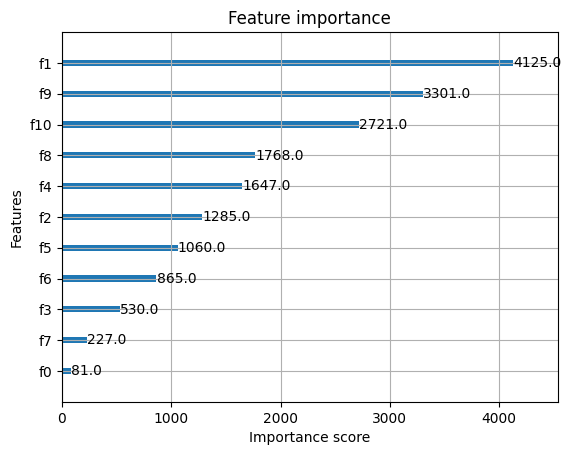

AttributeError: `feature_names_in_` is defined only when `X` has feature names that are all strings.

In [44]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(xgb_classifier.named_steps["classifier"])
plt.show()
print(xgb_classifier.named_steps["classifier"].feature_names_in_)

In [45]:
mlflow.set_tag("model_name", "Classification - XGBoost")

In [47]:
mlflow.set_tag("model_name", "Classification - Logistic Regression")

In [48]:
mlflow.set_tag("model_name", "Classification - Random Forest")

In [49]:
mlflow.set_tag("model_name", "Regression - Linear Regression")

In [50]:
mlflow.set_tag("model_name", "Regression - Random Forest Regressor")

In [53]:
import mlflow
import pandas as pd

mlflow.set_tracking_uri("http://127.0.0.1:5000")
experiment = mlflow.get_experiment_by_name("EMI_Prediction_Models")
experiment_id = experiment.experiment_id

runs_df = mlflow.search_runs(
    experiment_ids=[experiment_id],
    order_by=["start_time DESC"],
    max_results=50
)

print(runs_df.columns.tolist())

['run_id', 'experiment_id', 'status', 'artifact_uri', 'start_time', 'end_time', 'metrics.precision', 'metrics.f1_score', 'metrics.accuracy', 'metrics.recall', 'metrics.roc_auc', 'params.penalty', 'params.n_jobs', 'params.solver', 'params.C', 'params.verbose', 'params.max_iter', 'params.dual', 'params.tol', 'params.warm_start', 'params.l1_ratio', 'params.fit_intercept', 'params.multi_class', 'params.intercept_scaling', 'params.random_state', 'params.class_weight', 'tags.mlflow.source.type', 'tags.mlflow.runName', 'tags.model_name', 'tags.mlflow.user', 'tags.mlflow.source.name']


In [ ]:
import mlflow
import pandas as pd

# ✅ Connect to your local MLflow tracking server
mlflow.set_tracking_uri("http://127.0.0.1:5000")

# ✅ Load the experiment
experiment = mlflow.get_experiment_by_name("EMI_Prediction_Experiment")
experiment_id = experiment.experiment_id

# ✅ Fetch recent runs
runs_df = mlflow.search_runs(
    experiment_ids=[experiment_id],
    order_by=["start_time DESC"],
    max_results=50
)

# ✅ Print available run IDs and model names
print("✅ All Run IDs in Experiment:")
print(runs_df[["run_id", "tags.model_name", "start_time"]])

✅ All Run IDs in Experiment:
                             run_id                 tags.model_name  \
0  05ac2fc98a90477f98ecfba4e220f2df  Regression - XGBoost Regressor   
1  9b6cbe8dcaaf4dc29b459bf514c13752                            None   
2  cebc79dfe9944ede9ee475dd1df56e43                            None   
3  359331fb06a74752b067129884f40ca9                            None   

                        start_time  
0 2025-10-23 21:33:14.059000+00:00  
1 2025-10-23 18:35:30.934000+00:00  
2 2025-10-23 18:34:49.649000+00:00  
3 2025-10-23 18:01:03.380000+00:00  
